# TIGHT BINDING Functions

In [1]:
# Importando paquetes
%matplotlib inline
import numpy as np
import pandas as pd
from math import sqrt
from importnb import Notebook
import matplotlib.pyplot as plt
with Notebook(): import class_punto_cuantico
from class_punto_cuantico import punto_cuantico

In [2]:
#-----------------------------------------------------------------
# Funcion que genera una matriz de distancias entre los Carbonos.
#-----------------------------------------------------------------
# input:
#   atom: vector de 1s y 0s --> 'C'=1, 'H'=0.
#   coords: matriz de coordenadas: [[x], [y], [z]]
# output:
#   R: Matriz de distancias entre carbonos.
def getMatrizDistancias(atom,coords, r=False):
    atom, coords = np.array(atom), np.array(coords)
    x,y,z=coords
    x, y, z = x[atom==1.], y[atom==1.], z[atom==1.] #Extrayendo C.
    X1, X2 = np.meshgrid(x,x)
    Y1, Y2 = np.meshgrid(y,y)
    Z1, Z2 = np.meshgrid(z,z)
    R = np.sqrt((X2-X1)**2+(Y2-Y1)**2+(Z2-Z1)**2)
    if r==True: return R, Z2-Z1
    return R

#-----------------------------------------------------------------
# Funcion que obtiene la matriz T para 1 punto cuantico.
#-----------------------------------------------------------------
# input:
#   t: parametro t. (t=-2.8 si no se especifica).
#   atom: vector de 1s y 0s --> 'C'=1, 'H'=0.
#   coords: matriz de coordenadas: [[x], [y], [z]]
# output:
#   T: Matriz t.
def getT(atom,coords, t=-2.8):
    D = getMatrizDistancias(atom, coords)
    D[abs(D-1.44)>0.5]=0.
    D[D>0.]=t
    return np.array(D)

#---------------------------------------------------------------------
# Funcion que obtiene la matriz H para 2 puntos cuanticos superpuestos.
#---------------------------------------------------------------------
# input:
#   t, gamma, Beta: parametros. (-3.16, -0.39, 3.0) Si no se especifican.
#   atom: vector de 1s y 0s --> 'C'=1, 'H'=0.
#   coords: matriz de coordenadas: [[x], [y], [z]]
# output:
#   H: Matriz H
def getH(atom, coords, t=-3.16, gamma=-0.39, Beta=3.):
    D,r = getMatrizDistancias(atom, coords, r=True)
    H = np.zeros((len(D), len(D)))
    H[(abs(r)<1e-2)&(abs(D-1.44)<1e-2)]=t
    H[abs(r)>3.] = gamma*np.exp(-Beta*abs(D[abs(r)>3.]-3.3))
    return H

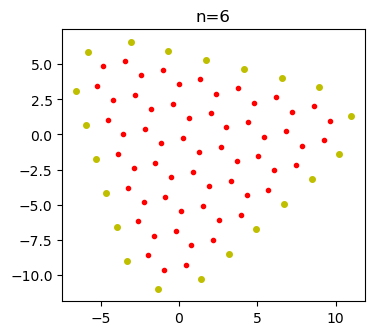

In [3]:
#--------------------------------------------------------------------
# Ejemplo de como generar y almacenar los datos de
# de un Punto cuantico Triangular.
#--------------------------------------------------------------------
# input:
#      n: Tamano punto cuantico triangular.
#    ang: Angulo de rotacion. (Opcional)-Por defecto: 0.0
#      d: Distancia en z. (Opcional)-Por defecto: 0.0
#   addH: True para agregar Hidrogenos, False e.o.c.
#         (Opcional)-Por defecto: False.
PCT = punto_cuantico(6, ang=np.pi/4, d=0.0, addH=True).Triangular()
atom = PCT.atomos # Vector de atomos.
coords = PCT.coords  # Matriz de Coordenadas de C+H [[x],[y],[z]]
coordsC = PCT.coordsC # Matriz de Coordenadas de Carbonos [[Cx], [Cy], [Cz]]
coordsH = PCT.coordsH # Matriz de Coordenadas de Hidrogenos [[Hx], [Hy], [Hz]]
N  = PCT.N  # Cantidad de atomos totales H+C.
nC = PCT.nC # Cantidad de Carbonos
nH = PCT.nH # Cantidad de Hidrogenos
PCT.graph() # Grafica

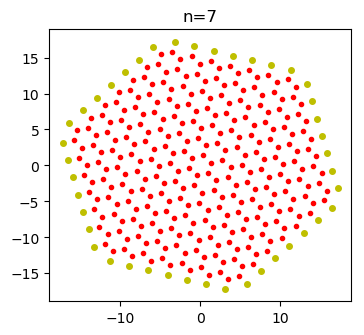

In [4]:
#--------------------------------------------------------------------
# Ejemplo de como generar y almacenar los datos de
# de un Punto cuantico Hexagonal.
#--------------------------------------------------------------------
# input:
#      n: Tamano punto cuantico hecagonal.
#    ang: Angulo de rotacion. (Opcional)-Por defecto: 0.0
#      d: Distancia en z. (Opcional)-Por defecto: 0.0
#   addH: True para agregar Hidrogenos, False si no.
#         (Opcional)-Por defecto: False.
PCH = punto_cuantico(7, ang=np.pi/4, d=0.0, addH=True).Hexagonal()
atom = PCH.atomos
coords = PCH.coords  # Matriz de Coordenadas de C+H [[x],[y],[z]]
coordsC = PCH.coordsC # Matriz de Coordenadas de Carbonos [[Cx], [Cy], [Cz]]
coordsH = PCH.coordsH # Matriz de Coordenadas de Hidrogenos [[Hx], [Hy], [Hz]]
N  = PCH.N  # Cantidad de atomos totales H+C.
nC = PCH.nC # Cantidad de Carbonos
nH = PCH.nH # Cantidad de Hidrogenos
PCH.graph() # Grafica

#Carbonos=46.000000
Sum(Diag(P))=46.000000


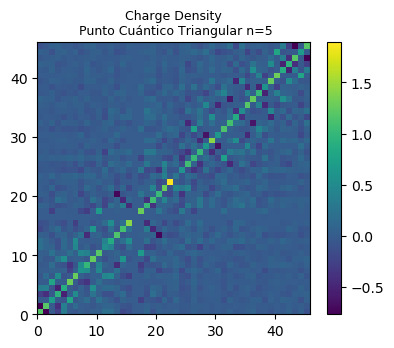

In [5]:
#-----------------------------------------------------------------------------------
# Funcion que calcula la densidad de carga de 1 punto cuantico TRIANGULAR con n impar.
# Nota: Esta funcion necesita correcciones y mejoras.
#------------------------------------------------------------------------------------
# input:
#   t, gamma, Beta: parametros. (-3.16, -0.39, 3.0) Si no se especifican.
#   atom: vector de 1s y 0s --> 'C'=1, 'H'=0.
#   coords: matriz de coordenadas: [[x], [y], [z]]
# output:
#   P: Matriz de densidad de carga
def ChargeDensity(atom, coords):
    T = getT(atom, coords)
    E, eigvec = np.linalg.eigh(T)
    nC = len(T) # Num Carbonos
    N = nC//2 # Num de ocupacion
    P = np.zeros((nC,nC))
    for t in range(nC):
        for u in range(nC):
            suma = 0.
            for i in range(N):
                suma += eigvec[i][t]*eigvec[i][u]
            P[t,u] = 2*suma
    print("#Carbonos=%f"%(nC))
    print("Sum(Diag(P))=%f"%np.sum(np.diag(P)))
    return P

#-----------------------------------------------------------------------------------
# Ejemplo:
#-----------------------------------------------------------------------------------
n=5
plt.figure(figsize=(4.4,3.6), dpi=100)
plt.title("Charge Density\n Punto Cuántico Triangular n="+str(n), 
          fontsize=9)
PCT = punto_cuantico(n, ang=0.0, d=0.0, addH=False).Triangular()
atom, coords = PCT.atomos, PCT.coords  
#................................
P = ChargeDensity(atom,coords)
#................................
x = plt.pcolor(P)
plt.colorbar(x)
plt.show()

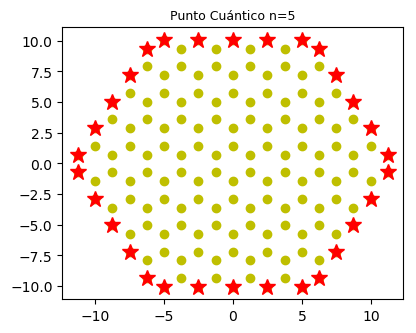

In [6]:
#-----------------------------------------------------------------------------------
# Funcion que obtiene las coordenadas de los Carbonos con dos vecinos.
#------------------------------------------------------------------------------------
# input:
#   parametro t (Opcional)
#   atom: vector de 1s y 0s --> 'C'=1, 'H'=0.
#   coords: matriz de coordenadas: [[x], [y], [z]]
# output:
#   bordes: matriz de coordenadas.
def coords_bordes(atom,coords, t=-2.8):
    T = getT(atom, coords, t=t)
    m,p = T.shape
    coords = np.transpose(coords)
    bordes=[]
    for i in range(m):
        Nvecinos = list(T[i]).count(t)
        if Nvecinos==2:
            bordes+=[coords[i]]
    return np.transpose(bordes)

#-----------------------------------------------------------------------------------
# Ejemplo:
#-----------------------------------------------------------------------------------
n=5
plt.figure(figsize=(4.4,3.6), dpi=100)
plt.title("Punto Cuántico n="+str(n), 
          fontsize=9)
PCH = punto_cuantico(n, ang=0.0, d=0.0, addH=False).Hexagonal()
atom, coords = PCH.atomos, PCH.coords  
#................................
x,y,z=coords_bordes(atom, coords)
#................................
plt.plot(coords[0],coords[1],'yo')
plt.plot(x,y,'*r', ms=12)
plt.show()

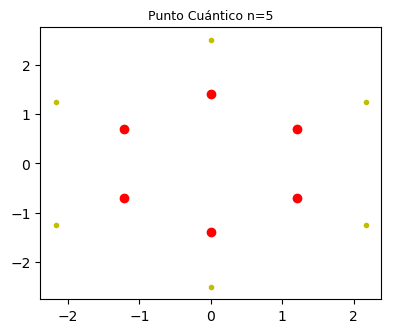

In [7]:
#------------------------------------------------
# Funcion que lee un archivo "xyz" y genera 
# guarda un vector de atomos y coordenadas.
#------------------------------------------------
# input:
#   archivo: Nombre del archivo (str)
# output:
#   atom: vector de 1s y 0s --> 'C'=1, 'H'=0.
#   coords: matriz de coordenadas: [[x], [y], [z]]
def readfile(archivo):
    file = open(archivo, "r")
    lines = file.readlines()
    atom, coords = [], []
    for line in lines[2:]:
        A, x, y, z= line.split()
        coords.append([x,y,z])
        if A == 'C': A = 1
        else: A = 0
        atom.append(A)
    file.close()
    coords = np.transpose(coords)
    return np.array(atom), np.array(coords, dtype=float)

#-----------------------------------------------------------------------------------
# Ejemplo:
#-----------------------------------------------------------------------------------
plt.figure(figsize=(4.4,3.6), dpi=100)
plt.title("Punto Cuántico n="+str(n), 
          fontsize=9)
#..................................................
atom, coords = readfile("benzene.xyz")
#...................................................
plt.plot(coords[0][atom==1],coords[1][atom==1],'ro')
plt.plot(coords[0][atom==0],coords[1][atom==0],'y.')
plt.show()

In [8]:
#------------------------------------------------
# Funcion que escrive un archivo "xyz" a partir
# de un vector de atomos y coordenadas.
#------------------------------------------------
# input:
#   atom: vector de 1s y 0s --> 'C'=1, 'H'=0.
#   coords: matriz de coordenadas: [[x], [y], [z]]
#   filename: Nombre del archivo (str)
# output:
#   archivo.
def write_coords(atom, coords, filename):
    x,y,z = coords
    f = open(filename, "w")
    f.write(str(len(atom))+"\n")
    f.write("XYZ"+"\n")
    for i in range(len(atom)):
        if atom[i]==1: a="C"
        else: a="H"
        f.write( a+"\t"
                  +str(x[i])+"\t"
                  +str(y[i])+"\t"
                  +str(z[i])+"\n")
    f.close()
    return 

#-----------------------------------------------------------------------------------
# Ejemplo:
#-----------------------------------------------------------------------------------
PCH = punto_cuantico(2, ang=0.0, d=0.0, addH=True, CH=1).Hexagonal()
atom, coords = PCH.atomos, PCH.coords 
#..................................................
write_coords(atom,coords,"hexagono-2.xyz")
#...................................................
! head -10 "hexagono-5.xyz"
print("continua...")

64
XYZ
C	0	5.76	0.0
C	-1.2470765814495914	5.04	0.0
C	1.2470765814495914	5.04	0.0
C	-1.2470765814495914	3.6	0.0
C	1.2470765814495914	3.6	0.0
C	-2.494153162899183	2.88	0.0
C	0.0	2.88	0.0
C	2.494153162899183	2.88	0.0
continua...


<img src="picture.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 3px;" />

### Adjuntando funciones para hacer gráficas.
(Ignorar).

In [9]:
def grafica1(E,x,y,atom):
    fig,(ax1,ax2) = plt.subplots(figsize=(8,3), dpi=100, ncols=2)
    ax1.set_title(u"Energías Benceno", fontsize=10, color='r')
    ax2.set_title(u"Benceno", fontsize=10, color='r')
    ax1.plot(E, 'o-')
    ax2.plot(x[atom==1.],y[atom==1.], 'or', ms=20)
    ax2.plot(x[atom!=1.],y[atom!=1.], 'oy', ms=15)
    plt.show()
    
def grafica2(n, E, eigvec, x, y, atom, eig):
    fig,(ax1,ax2) = plt.subplots(figsize=(8,2.5), dpi=110, ncols=2)
    ax1.set_title(u"Energías Triangular n="+str(n), fontsize=10, color='r')
    ax2.set_title(u"Punto Cuántico Triangular n="+str(n)+
                  "\nvector propio="+str(eig), fontsize=10, color='r')
    ax1.plot(E, 'b.-')
    Factor = np.array([eigvec[i][eig]*eigvec[i][eig] for i in range(len(E))])
    C = ax2.scatter(x[atom==1], y[atom==1], s=Factor*2000, c=E, cmap='jet')
    ax1.grid(alpha=0.4)
    cbar = fig.colorbar(C, label=u"Energías")
    [ax2.text(x[i], y[i], str(i), fontsize=7) for i in range(len(x[atom==1]))]
    plt.show()
    
def grafica3(i,E,x,y,atom):
    fig,(ax1,ax2) = plt.subplots(figsize=(8,2.5), dpi=110, ncols=2)
    ax1.set_title(u"Energías Triangular n="+str(i), fontsize=10, color='r')
    ax2.set_title(u"Punto Cuántico Triangular n="+str(i), fontsize=10, color='r')
    ax1.plot(E, 'b.-', ms=20/i)
    ax2.plot(x[atom==0], y[atom==0], '.', c='gray', ms=7-0.1*i)
    x,y=x[atom==1],y[atom==1]
    C = ax2.scatter(x, y, c='r', cmap='jet', s=100/i)
    ax1.grid(alpha=0.4)
    if i<10: [ax2.text(x[j]+0.1, y[j], str(j), fontsize=9-0.2*i) for j in range(len(x))]
    plt.show()